In [1]:
#import the data reader
from csv import reader

In [2]:
#read data from the data storage
# crime_data_lines = sc.textFile('/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()


In [3]:
header

Out[ 4 ]: 
['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [4]:
#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

In [5]:
#get the first line of data
display(crimes.take(2))

_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244


### how to solove our big data issues
####  approach 1: use RDD 
#### approach 2: use Dataframe, register the RDD to a dataframe
#### approach 3: use SQL

#### We provide 3 options to get distributed data into dataframe and SQL table

#### option 1 to get dataframe and sql

In [9]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/sf_data.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


#### option 2 to get dataframe and sql

In [11]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2.take(5))

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056


#### option 3 to get dataframe and sql

In [13]:
df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


#### 1st question: 
#####Write a Spark program that counts the number of crimes for different category.

In [15]:
#rdd based
catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
WARRANTS,312
SUSPICIOUS OCC,312
BURGLARY,302
MISSING PERSON,265


In [16]:
#dataframe based
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [17]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
# crimeCategory1 = spark.sql("SELECT substring(date, 7, 2) FROM sf_crime")

display(crimeCategory.select('Count'))

Count
2805
1002
991
780
650
353
312
312
302
265


####2nd question
##### Write a program that counts the number of crimes for different district

In [19]:
#rdd based
district_rdd = crimes.map(lambda item: (item[6],1))
from operator import add
q2_result = sorted(district_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(q2_result)

_1,_2
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


In [20]:
#Analize the top 3 crime types in each district
districts = ['SOUTHERN', 'MISSION', 'NORTHERN', 'CENTRAL','BAYVIEW','INGLESIDE','TARAVAL','TENDERLOIN','RICHMOND','PARK']
top_crime = {}
for dis in districts:
  tmp = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime WHERE PdDistrict = '%s' GROUP BY category ORDER BY Count DESC LIMIT 3"% dis)
  top_crime[dis] = tmp.select('*').collect()
  print dis, ':', top_crime[dis]

SOUTHERN : [Row(category=u'LARCENY/THEFT', Count=662), Row(category=u'NON-CRIMINAL', Count=203), Row(category=u'OTHER OFFENSES', Count=169)]
MISSION : [Row(category=u'LARCENY/THEFT', Count=304), Row(category=u'OTHER OFFENSES', Count=133), Row(category=u'NON-CRIMINAL', Count=127)]
NORTHERN : [Row(category=u'LARCENY/THEFT', Count=474), Row(category=u'OTHER OFFENSES', Count=107), Row(category=u'NON-CRIMINAL', Count=101)]
CENTRAL : [Row(category=u'LARCENY/THEFT', Count=490), Row(category=u'NON-CRIMINAL', Count=139), Row(category=u'OTHER OFFENSES', Count=90)]
BAYVIEW : [Row(category=u'LARCENY/THEFT', Count=151), Row(category=u'OTHER OFFENSES', Count=150), Row(category=u'VANDALISM', Count=89)]
INGLESIDE : [Row(category=u'LARCENY/THEFT', Count=125), Row(category=u'ASSAULT', Count=98), Row(category=u'OTHER OFFENSES', Count=81)]
TARAVAL : [Row(category=u'LARCENY/THEFT', Count=158), Row(category=u'OTHER OFFENSES', Count=80), Row(category=u'NON-CRIMINAL', Count=75)]
TENDERLOIN : [Row(category=u'LARCENY/THEFT', Count=95), Row(category=u'ASSAULT', Count=84), Row(category=u'OTHER OFFENSES', Count=79)]
RICHMOND : [Row(category=u'LARCENY/THEFT', Count=182), Row(category=u'NON-CRIMINAL', Count=75), Row(category=u'OTHER OFFENSES', Count=72)]
PARK : [Row(category=u'LARCENY/THEFT', Count=164), Row(category=u'NON-CRIMINAL', Count=75), Row(category=u'VANDALISM', Count=43)]

#### 3rd question
##### Write a program to count the number of crimes each Sunday at SF downtown. 
###### hints: define your spatial function for filtering data

In [22]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install shapely
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
#Geo boundry of downtown San Francisco, data from https://data.sfgov.org/Geographic-Locations-and-Boundaries/Planning-Neighborhood-Groups-Map/iacs-ws63
downtown_lats_vect= [(-122.40238040199989, 37.79096861000005), (-122.40196043399993, 37.788922170000035), (-122.40206572999995, 37.78872115200005), (-122.40583101099992, 37.785743988000036), (-122.40895215899991, 37.78328785200006), (-122.40914170999991, 37.78351908500008), (-122.41043324499992, 37.78995142300005), (-122.40238040199989, 37.79096861000005)]
polygon = Polygon(downtown_lats_vect) # create polygon
sunday_rdd = crimes.filter(lambda x: x[3]=='Sunday') # filter out crimes happened on Sunday
Locations = sunday_rdd.map(lambda p: [float(p[9]),float(p[10]),p[4]]).collect()
# display(Locations)
count = {}
for Location in Locations:
    point = Point(Location[0],Location[1])
    # check if polygon contains point or a point is in the polygon
    if point.within(polygon) or polygon.contains(point):
      if Location[2] in count:
        count[Location[2]] +=1
      else:
        count[Location[2]] =1


print 'Crimes each Sunday at SF downtown: ',count

Crimes each Sunday at SF downtown: {'07/23/2017': 16, '07/30/2017': 16, '07/16/2017': 18}

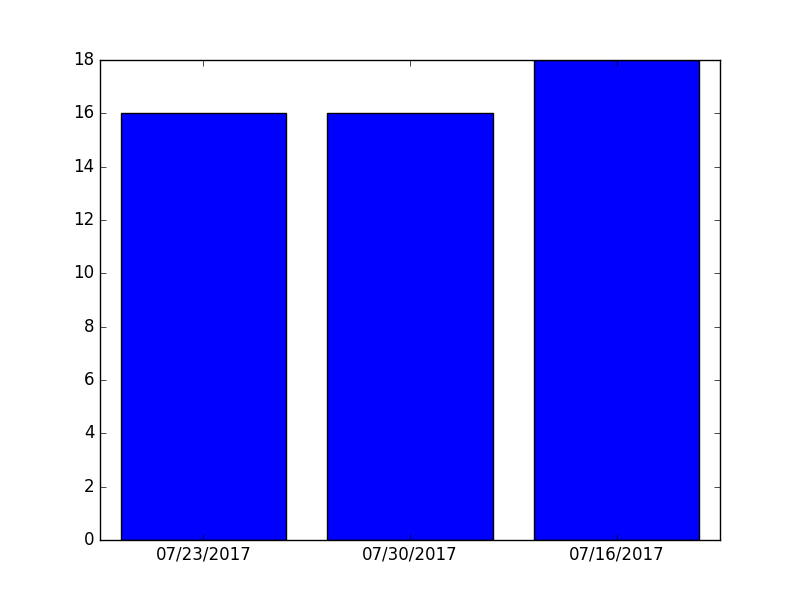

In [23]:
#Visualize the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(range(len(count)), count.values(), align='center')
ax.set(xticks=range(len(count)), xticklabels=list(count.keys()))

display(fig)

#### 4th question (bonus)
##### Extra: visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)

In [25]:
from pyspark.sql.types import FloatType
#In this part, we want to study the spatial distribution of crimes in SF
#Since kmeans groups objects solely on euclidean distance, it will be a good choice cluster the geo locations
crimes_x_y = spark.sql("SELECT X, Y FROM sf_crime WHERE X IS NOT NULL AND Y IS NOT NULL")
#change data type from string to float
crimes_x_y = crimes_x_y.withColumn("X", crimes_x_y["X"].cast(FloatType()))
crimes_x_y = crimes_x_y.withColumn("Y", crimes_x_y["Y"].cast(FloatType()))
display(crimes_x_y)

X,Y
-122.40062,37.78159
-122.43613,37.775204
-122.50911,37.75841
-122.46095,37.786896
-122.50943,37.77985
-122.45348,37.773052
-122.4662,37.77254
-122.466736,37.753716
-122.47356,37.743145
-122.403404,37.77542


In [26]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

vecAssembler = VectorAssembler(inputCols=["X","Y"], outputCol="features")
new_df = vecAssembler.transform(crimes_x_y)

from pyspark.ml.clustering import KMeans

optimum_cluster_num = 0
optimum_cost = float("inf")
for i in xrange(2,20):
  kmeans = KMeans(k=i, seed=1).setFeaturesCol('features')  # 2 clusters here
  model = kmeans.fit(new_df)
  transformed = model.transform(new_df)
  evaluator = ClusteringEvaluator()
#   silhouette = evaluator.evaluate(transformed)
  cost = model.computeCost(new_df)
#   print("Within Set Sum of Squared Errors = " + str(cost))
  if cost < optimum_cost:
    optimum_cost = cost
    optimum_cluster_num = i
    optimum_model = model
    optimum_transformed = transformed

print 'optimum_cluster_num', optimum_cluster_num
optimum_transformed.show()

optimum_cluster_num 19
+-----------+---------+--------------------+----------+
 X| Y| features|prediction|
+-----------+---------+--------------------+----------+
 -122.40062| 37.78159|[-122.40061950683...| 14|
 -122.43613|37.775204|[-122.43612670898...| 16|
 -122.50911| 37.75841|[-122.50910949707...| 4|
 -122.46095|37.786896|[-122.46095275878...| 12|
 -122.50943| 37.77985|[-122.50942993164...| 4|
 -122.45348|37.773052|[-122.45348358154...| 11|
 -122.4662| 37.77254|[-122.46620178222...| 12|
-122.466736|37.753716|[-122.46673583984...| 2|
 -122.47356|37.743145|[-122.47355651855...| 2|
-122.403404| 37.77542|[-122.40340423583...| 14|
 -122.49333|37.764732|[-122.49333190917...| 4|
 -122.47337|37.754944|[-122.47337341308...| 2|
 -122.42615| 37.73088|[-122.42614746093...| 5|
 -122.40397| 37.78483|[-122.40396881103...| 13|
 -122.45918|37.728397|[-122.45918273925...| 17|
-122.417755| 37.80611|[-122.41775512695...| 7|
 -122.42037| 37.7848|[-122.42037200927...| 9|
 -122.39806|37.779568|[-122.39806365966...| 14|
 -122.41474| 37.77872|[-122.41474151611...| 9|
 -122.38849|37.789574|[-122.38848876953...| 13|
+-----------+---------+--------------------+----------+
only showing top 20 rows

In [27]:
optimum_transformed.drop('features')

Out[ 53 ]: DataFrame[X: float, Y: float, prediction: int]

In [28]:
display(optimum_transformed)

X,Y,features,prediction
-122.40062,37.78159,"List(1, 2, List(), List(-122.40061950683594, 37.78158950805664))",14
-122.43613,37.775204,"List(1, 2, List(), List(-122.43612670898438, 37.775203704833984))",16
-122.50911,37.75841,"List(1, 2, List(), List(-122.50910949707031, 37.7584114074707))",4
-122.46095,37.786896,"List(1, 2, List(), List(-122.46095275878906, 37.786895751953125))",12
-122.50943,37.77985,"List(1, 2, List(), List(-122.50942993164062, 37.779850006103516))",4
-122.45348,37.773052,"List(1, 2, List(), List(-122.45348358154297, 37.77305221557617))",11
-122.4662,37.77254,"List(1, 2, List(), List(-122.46620178222656, 37.77254104614258))",12
-122.466736,37.753716,"List(1, 2, List(), List(-122.46673583984375, 37.75371551513672))",2
-122.47356,37.743145,"List(1, 2, List(), List(-122.47355651855469, 37.74314498901367))",2
-122.403404,37.77542,"List(1, 2, List(), List(-122.40340423583984, 37.775421142578125))",14
